In [1]:
import pyplotlib.pyplot as plot
import ROOT
from IPython.display import Image, display

In [2]:
# Read the file from the disk    
inputDir = "input/"    
file_DY    = ROOT.TFile.Open(inputDir + "ttbar3LCR2018_DY_MC_May13_v5.root","READ")
file_ttbar = ROOT.TFile.Open(inputDir + "ttbar3LCR2018_ttbar_MC_May13_v5.root","READ")
file_ZZ    = ROOT.TFile.Open(inputDir + "ttbar3LCR2018_ZZ_MC_May13_v5.root","READ")
file_WZ    = ROOT.TFile.Open(inputDir + "ttbar3LCR2018_WZ_MC_May13_v5.root","READ")
file_TTZ   = ROOT.TFile.Open(inputDir + "ttbar3LCR2018_TTZ_MC_May13_v5.root","READ")
file_TTW   = ROOT.TFile.Open(inputDir + "ttbar3LCR2018_TTW_MC_May13_v5.root","READ")
file_Data  = ROOT.TFile.Open(inputDir + "ttbar3LCR2018_Data_May13_v5.root","READ")

print(" \nfile opened in ROOT successfully..")


## Get the histograms

plotname = "mass12_all"
h_dy   = file_DY.Get(plotname); 
h_tt   = file_ttbar.Get(plotname);
h_zz   = file_ZZ.Get(plotname);
h_wz   = file_WZ.Get(plotname);  
h_ttz  = file_TTZ.Get(plotname);  
h_ttw  = file_TTW.Get(plotname); 
h_data = file_Data.Get(plotname);

##Scale
dtlumi = 59.8*1000;
ttlumi = 28701360/88.29;
ttzlumi = 13280000/0.2432;
ttwlumi = 4911941/0.2149;
dylumi = 99717900/5765.0;  
wzlumi =10527550/5.052;
zzlumi =98613000/1.325;

h_dy.Scale(dtlumi/dylumi)
h_tt.Scale(dtlumi/ttlumi)
h_wz.Scale(dtlumi/wzlumi)
h_zz.Scale(dtlumi/zzlumi)
h_ttw.Scale(dtlumi/ttwlumi)
h_ttz.Scale(dtlumi/ttzlumi)

print(f"Histograms read from file: {plotname} ")


 
file opened in ROOT successfully..
Histograms read from file: mass12_all 


In [3]:
plt = plot.Plotter()
plt.setExperiment("CMS")
plt.setExtraText("Work in progress")
plt.setEnergy("13 TeV")
plt.setYear("2018")
plt.setLumi("59.83")
plt.setPubStyle(False)
plt.show()

plot settings
Experiment:  CMS
ExtraText :  Work in progress
Energy    :  13 TeV
Year      :  2018
Luminosity:  59.83
PubStyle  :  False


In [4]:

#rebin=list(range(0,501,50))+[500,600,750,1000]
rebin=50

plt.figure()
plt.hist(h_dy,color='ROOT.kRed-9',label="DY",fill=True,stack=True)
plt.hist(h_tt,color='ROOT.kGreen-9',label="TT",fill=True,stack=True)
plt.hist(h_zz,color='ROOT.kMagenta-9',label="ZZ",fill=True,stack=True)
plt.hist(h_wz,color='ROOT.kOrange',label="WZ",fill=True,stack=True)
plt.hist(h_ttz,color='ROOT.kCyan-10',label="TTZ",fill=True,stack=True)
plt.hist(h_ttw,color='ROOT.kBlue-9',label="TTW",lwidth=3,fill=True,stack=True)
plt.hist(h_data,color='ROOT.kBlack',label="Data",lwidth=1,ls=0.7,isData=True)
plt.set_xaxis("Invariant Mass")
plt.set_yaxis("Events / 50 GeV",yrange=(0.1,1E7))
plt.set_yaxis_ratio("Obs/Exp",yrange=(0,2))
plt.legend(fontsize=0.04,col=1)
plt.Draw(logY=True,rebin=rebin,unc_fstyle=1003,unc_fcolor=ROOT.kGray)
plt.savefig("example_stackplot.png")
plt.savefig("example_stackplot.pdf")

debugging at the start of Draw
xlabel:  Invariant Mass
ylabel:  Events / 50 GeV
xrange:  (0, 1000)
yrange:  (0.1, 10000000.0)
ylabel_ratio:  Obs/Exp
yrange_ratio:  (0, 2)
h_data: Name: h_data Title: Pair03 mass NbinsX: 20
h_stack: {}
h_totbkg: Name: total background Title: Pair03 mass NbinsX: 20
h_MCuncband Name: MC Uncertainty band Title: Pair03 mass NbinsX: 20
h_ratio: Name: h_ratio Title:  NbinsX: 20
yerr_ratio: Name: unc_band_ratio Title: 


Info in <TCanvas::Print>: png file example_stackplot.png has been created
Info in <TCanvas::Print>: pdf file example_stackplot.pdf has been created


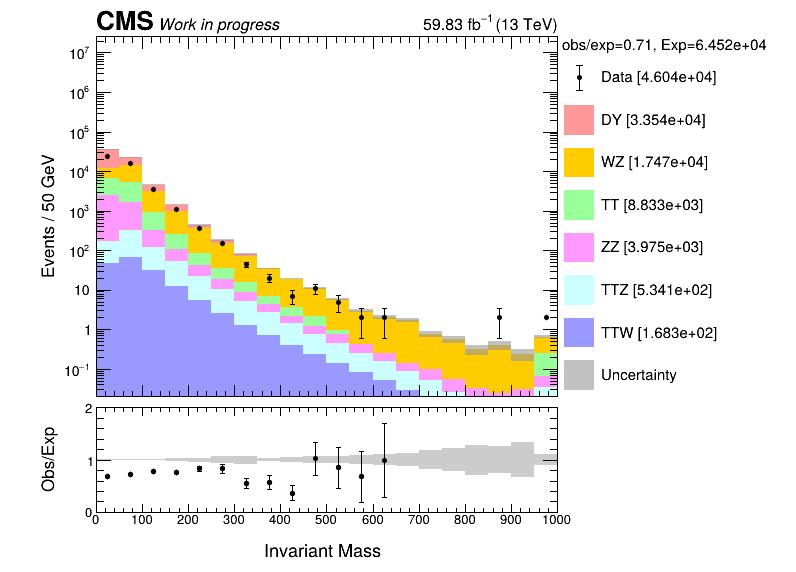

In [5]:
display(Image("example_stackplot.png"))

In [6]:
from pympler import asizeof
print(f"Total memory used by plotter: {asizeof.asizeof(plt)/1024} KB")

Total memory used by plotter: 9.6640625 KB


In [15]:
#rebin=list(range(0,501,50))+[500,600,750,1000]
rebin=20
#rebin=list(range(100,501,50))+[500,600,800]
print(rebin)
plt.figure()
plt.hist(h_dy,color='ROOT.kRed-9',label="DY",fill=True,stack=True)
plt.hist(h_tt,color='ROOT.kGreen-9',label="TT",fill=True,stack=True)
plt.hist(h_zz,color='ROOT.kMagenta-9',label="ZZ",fill=True,stack=True)
plt.hist(h_wz,color='ROOT.kOrange',label="WZ",fill=True,stack=True)
plt.hist(h_ttz,color='ROOT.kCyan-10',label="TTZ",fill=True,stack=True)
plt.hist(h_ttw,color='ROOT.kBlue-9',label="TTW",lwidth=3,fill=True,stack=True)
plt.hist(h_data,color='ROOT.kBlack',label="Data",lwidth=1,ls=0.7,isData=True)
plt.set_xaxis("Invariant Mass",xrange=(0,1000))
plt.set_yaxis(f"Events / {rebin} GeV",yrange=(0.1,1E7))
plt.set_yaxis_ratio("Obs/Exp",yrange=(0,2))
plt.legend(fontsize=0.04,col=1)
plt.Draw(logY=True,rebin=rebin,unc_fstyle=1003,unc_fcolor=ROOT.kGray,truncate_xrange=True)
plt.savefig("example_stackplot.png")
plt.savefig("example_stackplot.pdf")

20
debugging at the start of Draw
xlabel:  Invariant Mass
ylabel:  Events / 20 GeV
xrange:  (0, 1000)
yrange:  (0.1, 10000000.0)
ylabel_ratio:  Obs/Exp
yrange_ratio:  (0, 2)
h_data: Name: h_data Title: Pair03 mass NbinsX: 50
h_stack: {}
h_totbkg: Name: total background Title: Pair03 mass NbinsX: 50
h_MCuncband Name: MC Uncertainty band Title: Pair03 mass NbinsX: 50
h_ratio: Name: h_ratio Title:  NbinsX: 50
yerr_ratio: Name: unc_band_ratio Title: 


Info in <TCanvas::Print>: png file example_stackplot.png has been created
Info in <TCanvas::Print>: pdf file example_stackplot.pdf has been created


In [19]:
#rebin=list(range(0,501,50))+[500,600,750,1000]
rebin=10
#rebin=list(range(100,501,50))+[500,600,800]
print(rebin)
plt.figure(canvName="can_overlay1",w=800,h=600)
plt.hist(h_dy,color='ROOT.kRed-9',lwidth=1,fill=False,label="DY")
plt.hist(h_tt,color='ROOT.kGreen-9',lwidth=1,label="TT")
plt.hist(h_zz,color='ROOT.kMagenta-9',lwidth=1,label="ZZ")
plt.hist(h_wz,color='ROOT.kOrange',lwidth=1,label="WZ")

plt.set_xaxis("Invariant Mass",xrange=(0,1000))
plt.set_yaxis(f"Events / {rebin} GeV",yrange=(0.1,1E6))
plt.set_yaxis_ratio("Obs/Exp",yrange=(0,2))
plt.legend(fontsize=0.04,col=1)
plt.Draw(logY=True,rebin=rebin)
plt.savefig("example_overlayplot.png")
plt.savefig("example_overlayplot.pdf")

10
debugging at the start of Draw
xlabel:  Invariant Mass
ylabel:  Events / 10 GeV
xrange:  (0, 1000)
yrange:  (0.1, 1000000.0)
ylabel_ratio:  Obs/Exp
yrange_ratio:  (0, 2)
h_data: None
h_stack: None
h_totbkg: None
h_MCuncband None
h_ratio: Name: h_ratio Title:  NbinsX: 100
yerr_ratio: Name: unc_band_ratio Title: 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: can_overlay1
Info in <TCanvas::Print>: png file example_overlayplot.png has been created
Info in <TCanvas::Print>: pdf file example_overlayplot.pdf has been created


In [9]:
def truncate_histogram(h_orig, xmin, xmax, new_name="h_subrange"):
    # Get bin range corresponding to xmin and xmax
    bin_low = h_orig.FindBin(xmin)
    bin_high = h_orig.FindBin(xmax)-1

    print("binNo_low:",bin_low)
    print("binNo_hi:",bin_high)
    
    # Get the bin edges
    xlow = h_orig.GetXaxis().GetBinLowEdge(bin_low)
    xhigh = h_orig.GetXaxis().GetBinUpEdge(bin_high)
    nbins = bin_high - bin_low + 1

    print("xlow:",xlow)
    print("xhigh:",xhigh)
    
    # Create new histogram
    h_new = ROOT.TH1D(new_name, h_orig.GetTitle(), nbins, xlow, xhigh)
    #h_new = h_orig.Clone()
    h_new.SetName(new_name)
    h_new.SetDirectory(0)  # optional: detach from current file

    # Copy bin contents and errors
    for i in range(nbins):
        source_bin = bin_low + i
        target_bin = i + 1

        content = h_orig.GetBinContent(source_bin)
        error = h_orig.GetBinError(source_bin)

        h_new.SetBinContent(target_bin, content)
        h_new.SetBinError(target_bin, error)

    return h_new

In [10]:
h_dy_dev = h_tt.Clone()
h_dy_dev.Rebin(10)

h_dy_truncated = truncate_histogram(h_dy_dev,50,150,"truncated_hdy")

binNo_low: 6
binNo_hi: 15
xlow: 50.0
xhigh: 150.0


In [11]:
print(h_dy_truncated)

Name: truncated_hdy Title: Pair03 mass NbinsX: 10


In [12]:
for i in range(1,h_dy_dev.GetNbinsX()+1):
    binlow   = h_dy_dev.GetBinLowEdge(i)
    binwidth = h_dy_dev.GetBinWidth(i)
    print(i,binlow,binlow+binwidth,h_dy_dev.GetBinContent(i),h_dy_dev.GetBinError(i))

1 0.0 10.0 241.16424560546875 6.660572663507216
2 10.0 20.0 499.2522888183594 9.583301383584974
3 20.0 30.0 923.6351318359375 13.034828918277864
4 30.0 40.0 1263.2149658203125 15.243817771023917
5 40.0 50.0 1335.876953125 15.676111615637621
6 50.0 60.0 1234.51806640625 15.069673541014131
7 60.0 70.0 981.0289306640625 13.433711480289404
8 70.0 80.0 699.0267944335938 11.339711956807424
9 80.0 90.0 494.8373718261719 9.540834551084558
10 90.0 100.0 330.01422119140625 7.791506621931177
11 100.0 110.0 226.44789123535156 6.454152922551773
12 110.0 120.0 141.27699279785156 5.097894396561178
13 120.0 130.0 102.83052062988281 4.349267591101401
14 130.0 140.0 76.52503967285156 3.751948686018418
15 140.0 150.0 60.3370475769043 3.331556221726073
16 150.0 160.0 46.17255783081055 2.9143860905904835
17 160.0 170.0 34.39947509765625 2.5155388445592446
18 170.0 180.0 28.880844116210938 2.3049422621121014
19 180.0 190.0 22.626392364501953 2.040153198155874
20 190.0 200.0 16.92380714416504 1.7644288018796

In [13]:
for i in range(1,h_dy_truncated.GetNbinsX()+1):
    binlow   = h_dy_truncated.GetBinLowEdge(i)
    binwidth = h_dy_truncated.GetBinWidth(i)
    print(i,binlow,binlow+binwidth,h_dy_truncated.GetBinContent(i),h_dy_truncated.GetBinError(i))

1 50.0 60.0 1234.51806640625 15.069673541014131
2 60.0 70.0 981.0289306640625 13.433711480289404
3 70.0 80.0 699.0267944335938 11.339711956807424
4 80.0 90.0 494.8373718261719 9.540834551084558
5 90.0 100.0 330.01422119140625 7.791506621931177
6 100.0 110.0 226.44789123535156 6.454152922551773
7 110.0 120.0 141.27699279785156 5.097894396561178
8 120.0 130.0 102.83052062988281 4.349267591101401
9 130.0 140.0 76.52503967285156 3.751948686018418
10 140.0 150.0 60.3370475769043 3.331556221726073


In [14]:
6 50.0 60.0 1234.51806640625 15.069673541014131
7 60.0 70.0 981.0289306640625 13.433711480289404
8 70.0 80.0 699.0267944335938 11.339711956807424
9 80.0 90.0 494.8373718261719 9.540834551084558
10 90.0 100.0 330.01422119140625 7.791506621931177
11 100.0 110.0 226.44789123535156 6.454152922551773
12 110.0 120.0 141.27699279785156 5.097894396561178
13 120.0 130.0 102.83052062988281 4.349267591101401
14 130.0 140.0 76.52503967285156 3.751948686018418
15 140.0 150.0 60.3370475769043 3.331556221726073

SyntaxError: invalid syntax (127132297.py, line 1)